In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.models import Model,Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

In [3]:
import os

### **Structure of the Dataset**:

Each CSV file in this dataset contains multiple rows, where:
- **Each row** represents an **ECG heartbeat segment**.
- **Each column** contains a **numerical value** corresponding to the signal data for a specific time point in that heartbeat segment.
- The **last column** of each row contains the **label** or **class** of the heartbeat (for example, normal heartbeat or an arrhythmia type).

#### **Here’s a basic explanation of the CSV structure**:

1. **Rows**:
   - Every row corresponds to one heartbeat's data.
   - For example, Row 1 has the ECG signal values for the first heartbeat in the dataset, Row 2 has the signal for the second heartbeat, and so on.

2. **Columns**:
   - Most columns contain the **ECG signal values** at specific time points. These are just numbers that represent how the heart’s electrical activity changes over time.
   - The **last column** of each row is a label or class that shows what type of heartbeat this is. The labels might be:
     - `0` for a **normal** heartbeat.
     - `1`, `2`, `3`, etc. for different types of **arrhythmias** or other conditions like **myocardial infarction**.

---

### **Example**:

Let’s say you have a CSV file that looks like this:

| Value 1 | Value 2 | Value 3 | ... | Value 188 | Class |
|---------|---------|---------|-----|-----------|-------|
| -0.123  | 0.234   | -0.101  | ... | 0.078     | 0     |
| 0.456   | -0.987  | 0.134   | ... | -0.456    | 1     |
| 0.230   | -0.234  | 0.567   | ... | 0.345     | 2     |

In this example:
- **Value 1, Value 2, ..., Value 188** are the ECG signal values for each heartbeat. These values represent how the electrical activity of the heart changes over a short period (each ECG beat is captured in **188 time points**).
- The **Class** column represents the type of heartbeat for that particular segment:
  - `0`: Normal heartbeat.
  - `1`: Arrhythmia type 1.
  - `2`: Arrhythmia type 2.
  - And so on.

---

### **What Do the ECG Signal Values Represent?**

- The numbers in each row (except for the last column) represent the **voltage** or **electrical activity** of the heart measured over time for one heartbeat.
- When you plot these values, you get a shape similar to an ECG waveform (which shows the P wave, QRS complex, and T wave). Each heartbeat segment will have a unique waveform depending on the type of heartbeat.

---

### **Class Labels and What They Mean**:

In this dataset, the heartbeat can belong to different classes. Here are the main types:

1. **Class 0 - N**: Normal heartbeat.
2. **Class 1 - S**: Supraventricular premature beat (a type of arrhythmia).
3. **Class 2 - V**: Premature ventricular contraction (another type of arrhythmia).
4. **Class 3 - F**: Fusion of ventricular and normal beat.
5. **Class 4 - Q**: Unclassifiable beat (heartbeats that don't fit into the common categories).

---

### **How to Interpret the CSV Files**:

- The CSV files provide **segmented heartbeats**, where each segment corresponds to one heartbeat.
- Each heartbeat is represented by **188 numerical values** that describe how the heart's electrical signal changes over time.
- The **last column** tells you the class or type of that heartbeat (whether it’s normal or abnormal).

---

### **Practical Example**:

1. If you want to train a neural network to classify these heartbeats:
   - **Input**: The first 188 columns (the ECG values) will be your input to the network.
   - **Output**: The last column (class label) will be the target output that the model should predict.

2. If you're plotting the ECG signals:
   - You can take one row (excluding the last column), plot it as a time-series, and you'll see an ECG waveform.

---

### **Summary**:
- **Rows** = each row is one heartbeat.
- **Columns** = 188 time points of ECG data + 1 label (class).
- **Labels** = normal or different types of abnormal heartbeats.
- The dataset is pre-segmented and cleaned, so each row is ready for use in machine learning models.


In [8]:
normal = pd.read_csv(r'C:\Users\DELL\Desktop\ECG MLP\ptbdb_normal.csv')
abnormal = pd.read_csv(r"C:\Users\DELL\Desktop\ECG MLP\ptbdb_abnormal.csv")
# View the first few rows of the dataset
print(normal.head())



   9.779411554336547852e-01  9.264705777168273926e-01  \
0                  0.960114                  0.863248   
1                  1.000000                  0.659459   
2                  0.925414                  0.665746   
3                  0.967136                  1.000000   
4                  0.927461                  1.000000   

   6.813725233078002930e-01  2.450980395078659058e-01  \
0                  0.461538                  0.196581   
1                  0.186486                  0.070270   
2                  0.541436                  0.276243   
3                  0.830986                  0.586854   
4                  0.626943                  0.193437   

   1.544117629528045654e-01  1.911764740943908691e-01  \
0                  0.094017                  0.125356   
1                  0.070270                  0.059459   
2                  0.196133                  0.077348   
3                  0.356808                  0.248826   
4                  0.094991  

In [9]:
print(normal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, 9.779411554336547852e-01 to 0.000000000000000000e+00.88
dtypes: float64(188)
memory usage: 125.6 MB
None


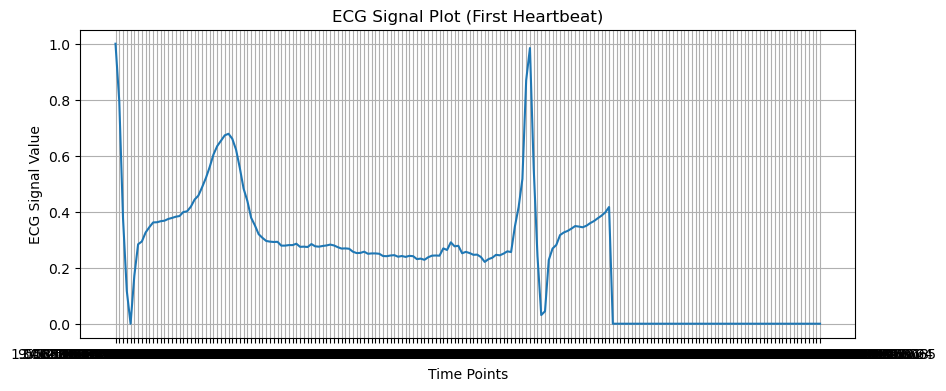

In [13]:
# Extract the first row (without the last column, which is the class label)
ecg_signal = normal.iloc[0, :]

# Plot the ECG signal
plt.figure(figsize=(10, 4))
plt.plot(ecg_signal)
plt.title("ECG Signal Plot (First Heartbeat)")
plt.xlabel("Time Points")
plt.ylabel("ECG Signal Value")
plt.grid(True)
plt.show()


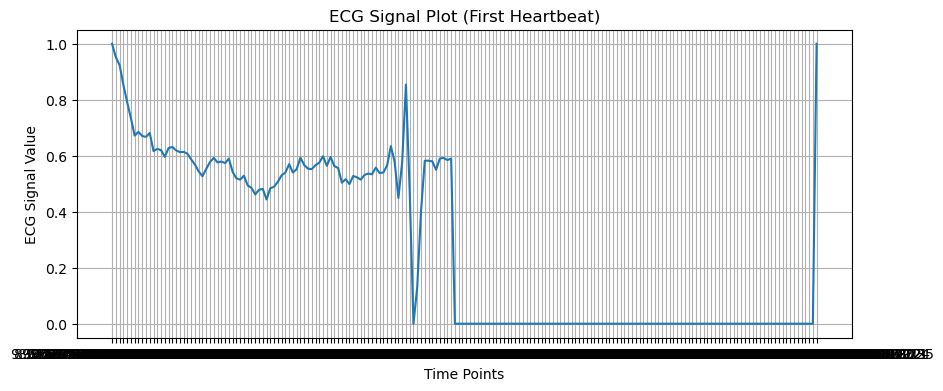

In [15]:
# Extract the first row (without the last column, which is the class label)
ecg_signal = abnormal.iloc[1, :]

# Plot the ECG signal
plt.figure(figsize=(10, 4))
plt.plot(ecg_signal)
plt.title("ECG Signal Plot (First Heartbeat)")
plt.xlabel("Time Points")
plt.ylabel("ECG Signal Value")
plt.grid(True)
plt.show()


In [24]:
# Print the last column (class/label column)
last_column = abnormal.iloc[:, -1]  # '-1' index selects the last column

# Display the first few rows of the last column
print(last_column.head())  # Print the first 5 class labels

# You can also see the unique classes present in the last column (e.g., the types of heartbeats)
print("Unique class labels:", last_column.unique())

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: 1.000000000000000000e+00.1, dtype: float64
Unique class labels: [1.]


In [28]:
# Assign column names
num_features = 187  # Number of ECG signal values per heartbeat
normal.columns = list(range(num_features)) + ['class']
abnormal.columns = list(range(num_features)) + ['class']

# Check the columns to verify
print("Normal Data Columns:\n", normal.columns)
print("Abnormal Data Columns:\n", abnormal.columns)


Normal Data Columns:
 Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           178,     179,     180,     181,     182,     183,     184,     185,
           186, 'class'],
      dtype='object', length=188)
Abnormal Data Columns:
 Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           178,     179,     180,     181,     182,     183,     184,     185,
           186, 'class'],
      dtype='object', length=188)


In [30]:
# Set class labels
normal['class'] = 0
abnormal['class'] = 1

In [31]:
print(normal.iloc[:,-1])

0       0
1       0
2       0
3       0
4       0
       ..
4040    0
4041    0
4042    0
4043    0
4044    0
Name: class, Length: 4045, dtype: int64


In [32]:
# Combine the two datasets
data = pd.concat([normal, abnormal])

# Shuffle the dataset (for training)
data = data.sample(frac=1).reset_index(drop=True)

# Check the combined dataset
print("Combined data shape:", data.shape)
print("Class distribution:\n", data.iloc[:, -1].value_counts())  # Check class distribution (0 for normal, 1 for abnormal)

Combined data shape: (14550, 188)
Class distribution:
 1    10505
0     4045
Name: class, dtype: int64


In [33]:
# Check the last column of the normal dataset to ensure it contains class 0
print("Normal data class distribution:\n", normal.iloc[:, -1].value_counts())


Normal data class distribution:
 0    4045
Name: class, dtype: int64


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
291/291 - 4s - 12ms/step - accuracy: 0.7922 - loss: 0.4117 - val_accuracy: 0.8664 - val_loss: 0.2977
Epoch 2/20
291/291 - 1s - 2ms/step - accuracy: 0.8591 - loss: 0.3101 - val_accuracy: 0.9012 - val_loss: 0.2399
Epoch 3/20
291/291 - 1s - 3ms/step - accuracy: 0.8893 - loss: 0.2606 - val_accuracy: 0.8973 - val_loss: 0.2305
Epoch 4/20
291/291 - 1s - 2ms/step - accuracy: 0.9070 - loss: 0.2279 - val_accuracy: 0.9321 - val_loss: 0.1886
Epoch 5/20
291/291 - 1s - 3ms/step - accuracy: 0.9149 - loss: 0.2058 - val_accuracy: 0.9369 - val_loss: 0.1635
Epoch 6/20
291/291 - 1s - 3ms/step - accuracy: 0.9292 - loss: 0.1779 - val_accuracy: 0.9433 - val_loss: 0.1522
Epoch 7/20
291/291 - 1s - 3ms/step - accuracy: 0.9387 - loss: 0.1612 - val_accuracy: 0.9463 - val_loss: 0.1377
Epoch 8/20
291/291 - 1s - 3ms/step - accuracy: 0.9393 - loss: 0.1493 - val_accuracy: 0.9454 - val_loss: 0.1365
Epoch 9/20
291/291 - 1s - 3ms/step - accuracy: 0.9505 - loss: 0.1340 - val_accuracy: 0.9442 - val_loss: 0.1426


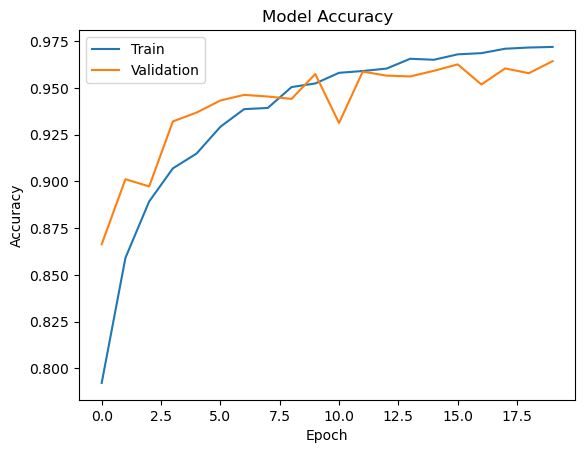

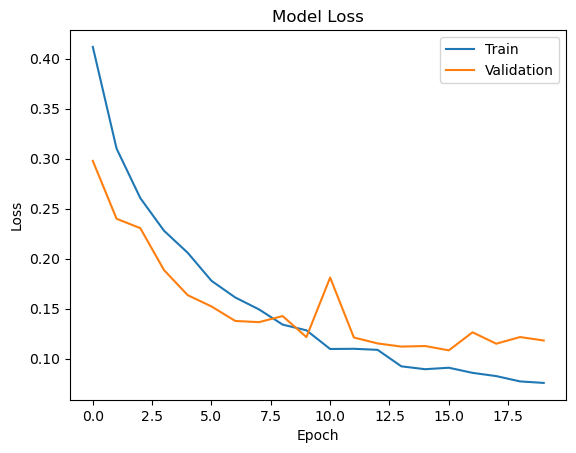

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Separate features and labels
X = data.iloc[:, :-1]  # All columns except the last one
y = data['class']      #labels

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and compile the MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification: 0 or 1
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\nTest Accuracy:", test_acc)

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()


### 1. **Data Normalization with `StandardScaler`**

#### **Standardization (Normalization) with `StandardScaler`**

The goal of normalization is to transform features so that they have similar scales. This helps in speeding up convergence during training and can improve the performance of many machine learning algorithms.

1. **StandardScaler**:
   - **Purpose**: StandardScaler standardizes features by removing the mean and scaling to unit variance.
   - **Equation**:
     \[
     X_{\text{scaled}} = \frac{X - \mu}{\sigma}
     \]
     Where:
     - \(X\) is the original feature value.
     - \(\mu\) is the mean of the feature.
     - \(\sigma\) is the standard deviation of the feature.
     - \(X_{\text{scaled}}\) is the scaled feature value.

2. **Usage**:
   ```python
   scaler = StandardScaler()
   X = scaler.fit_transform(X)
   ```
   - **`StandardScaler()`**: Initializes the scaler.
   - **`fit_transform(X)`**: Computes the mean and standard deviation of each feature (using `fit`), and then scales the features (using `transform`).

### 2. **Splitting Data with `train_test_split`**

#### **Purpose**:
- To evaluate the model's performance, the data is divided into training and testing sets. This allows you to train the model on one subset of data and test it on another to assess its generalization capability.

#### **Usage**:
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
- **`test_size=0.2`**: Specifies that 20% of the data will be used for testing, and 80% will be used for training.
- **`random_state=42`**: Ensures the data split is reproducible by setting a seed for the random number generator.

### 3. **Building the Multi-Layer Perceptron (MLP) Model**

#### **Model Architecture**:
- **Sequential**: A linear stack of layers.

1. **Dense Layers**:
   - **Purpose**: Fully connected layers where each neuron is connected to every neuron in the previous layer.
   - **Equations for Dense Layers**:
     For a layer with activation function \( f \):
     \[
     Z = W \cdot X + b
     \]
     \[
     A = f(Z)
     \]
     Where:
     - \(W\) is the weight matrix.
     - \(X\) is the input feature vector.
     - \(b\) is the bias vector.
     - \(Z\) is the linear combination of inputs.
     - \(A\) is the output after applying the activation function \(f\).

2. **Activation Functions**:
   - **ReLU (Rectified Linear Unit)**:
     \[
     \text{ReLU}(x) = \max(0, x)
     \]
     This activation function introduces non-linearity and helps with the vanishing gradient problem.
   - **Sigmoid**:
     \[
     \sigma(x) = \frac{1}{1 + e^{-x}}
     \]
     This function maps the input values to a probability between 0 and 1, suitable for binary classification.

3. **Dropout Layer**:
   - **Purpose**: Regularization technique to prevent overfitting by randomly setting a fraction of input units to zero during training.
   - **Equation**:
     If a neuron is dropped with probability \(p\):
     \[
     \text{Dropout}(x) = x \cdot \text{Bernoulli}(1-p)
     \]
     Where Bernoulli(1-p) is a random variable that is 0 with probability \(p\) and 1 with probability \(1-p\).

4. **Model Compilation**:
   ```python
   model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
   ```
   - **Optimizer**:
     - **Adam**: Adaptive moment estimation combines the advantages of two other optimizers: AdaGrad and RMSProp. It adapts the learning rate based on the moving average of the gradient and its square.
   - **Loss Function**:
     - **Binary Cross-Entropy**:
       \[
       \text{Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
       \]
       Where \(y_i\) is the true label and \(\hat{y}_i\) is the predicted probability for class 1.

   - **Metrics**:
     - **Accuracy**: The fraction of correct predictions over the total number of predictions.

### 4. **Training the Model**

```python
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=2)
```
- **`fit`**: Trains the model on the training data.
  - **`epochs=20`**: Number of complete passes through the training dataset.
  - **`batch_size=32`**: Number of samples processed before the model is updated.
  - **`validation_split=0.2`**: Fraction of training data used as validation data to monitor the model's performance.
  - **`verbose=2`**: Provides detailed output during training.

### 5. **Evaluating the Model**

```python
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\nTest Accuracy:", test_acc)
```
- **`evaluate`**: Tests the model on the test dataset to assess its performance.
- **`verbose=2`**: Provides detailed output during evaluation.

### 6. **Plotting Results**

1. **Accuracy Plot**:
   ```python
   plt.plot(history.history['accuracy'])
   plt.plot(history.history['val_accuracy'])
   plt.title('Model Accuracy')
   plt.xlabel('Epoch')
   plt.ylabel('Accuracy')
   plt.legend(['Train', 'Validation'])
   plt.show()
   ```
   - **Purpose**: To visualize how the model’s accuracy changes over epochs for both training and validation data.

2. **Loss Plot**:
   ```python
   plt.plot(history.history['loss'])
   plt.plot(history.history['val_loss'])
   plt.title('Model Loss')
   plt.xlabel('Epoch')
   plt.ylabel('Loss')
   plt.legend(['Train', 'Validation'])
   plt.show()
   ```
   - **Purpose**: To visualize how the model’s loss changes over epochs for both training and validation data.

This step-by-step explanation covers the entire process from data preprocessing to model evaluation and visualization. Let me know if you need more details on any specific part!